In [2]:
#packages
import pandas as pd
import spacy
import re
import string
import nltk
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

In [3]:
#Importing the data - Jan2014 & 2014
#--------------------------------------
df1 = pd.read_excel(r'C:\Users\NB332021\OneDrive - Nedbank\Desktop\Thesis\Data\Dataset for each year\2014\Jan14\X2014_1.xlsx')
df2 = pd.read_csv(r'C:\Users\NB332021\OneDrive - Nedbank\Desktop\Thesis\Data\Cons2014.csv')
#Cleaning Data
#drop duplicates
df1 = df1.drop_duplicates(keep='first')
df2 = df2.drop_duplicates(keep='first')
#removing numbers
df1['text'] = df1['text'].astype('string')
df1.dropna(subset=['text'], inplace=True)
df2['text'] = df2['text'].astype('string')
df2.dropna(subset=['text'], inplace=True)
#lowercase
df1['text']=df1['text'].apply(lambda x: x.lower())
df2['text']=df2['text'].apply(lambda x: x.lower())
#removing mentions
df1['text']=df1['text'].apply(lambda x: re.sub("@[A-Za-z0-9_]+",'', x))
df2['text']=df2['text'].apply(lambda x: re.sub("@[A-Za-z0-9_]+",'', x))
#removing numbers and words containing numbers
df1['text']=df1['text'].apply(lambda x: re.sub('\w*\d\w*','', x))
df2['text']=df2['text'].apply(lambda x: re.sub('\w*\d\w*','', x))
#removing hashtags?
#df1['text']=df1['text'].apply(lambda x: re.sub("#[A-Za-z0-9_]+",'', x))
#df1['text']=df1['text'].apply(lambda x: re.split('#|_', x))
df1['text']=df1['text'].apply(lambda x: " ".join(word.strip() for word in re.split('#|_', x)))
df2['text']=df2['text'].apply(lambda x: " ".join(word.strip() for word in re.split('#|_', x)))
#removing links
df1['text']=df1['text'].apply(lambda x: re.sub(r"http\S+",'', x))
df1['text']=df1['text'].apply(lambda x: re.sub(r"www.\S+",'', x))
df2['text']=df2['text'].apply(lambda x: re.sub(r"http\S+",'', x))
df2['text']=df2['text'].apply(lambda x: re.sub(r"www.\S+",'', x))
#removing punctuation
df1['text']=df1['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
df2['text']=df2['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
#removing empty spaces and special characters
df1['text']=df1['text'].apply(lambda x: re.sub('[^A-Za-z0-9]+',' ',x))
df2['text']=df2['text'].apply(lambda x: re.sub('[^A-Za-z0-9]+',' ',x))
#stopwords
nlp = spacy.load('en_core_web_sm')
# Print the set of spaCy's default stop words (remember that sets are unordered):
print(nlp.Defaults.stop_words)
#add twitter as a stop word and rt
# Add the word to the set of stop words. Use LOWERCASE!
nlp.Defaults.stop_words.add('twitter')
nlp.Defaults.stop_words.add('rt')
nlp.Defaults.stop_words.add('s')
nlp.Defaults.stop_words.add('tweet')
nlp.Defaults.stop_words.add('trend')
nlp.Defaults.stop_words.add('follower')
nlp.Defaults.stop_words.add('null')
nlp.Defaults.stop_words.add('http')
nlp.Defaults.stop_words.add('url')
nlp.Defaults.stop_words.add('trend')
nlp.Defaults.stop_words.add('trending')
# Set the stop_word tag on the lexeme
nlp.vocab['twitter'].is_stop = True
nlp.vocab['rt'].is_stop = True
nlp.vocab['s'].is_stop = True
nlp.vocab['tweet'].is_stop = True
nlp.vocab['trend'].is_stop = True
nlp.vocab['follower'].is_stop = True
nlp.vocab['null'].is_stop = True
nlp.vocab['http'].is_stop = True
nlp.vocab['url'].is_stop = True
nlp.vocab['trend'].is_stop = True
nlp.vocab['trending'].is_stop = True
stop = nlp.Defaults.stop_words
#lemmatisation
# Loading model
nlp = spacy.load('en_core_web_sm')

# Lemmatization with stopwords removal
#df1["text"]=df1["text"].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if ((token.is_stop==False)&((token.pos_=="ADJ")|(token.pos_=="NOUN")|(token.pos_=="VERB")))]))
#df1.head()

df1["text"]=df1["text"].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if ((token.is_stop==False))]))
df2["text"]=df2["text"].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if ((token.is_stop==False))]))
#getting rid of empty text rows
df1.dropna(subset = "text", inplace=True)
df1.shape
df2.dropna(subset = "text", inplace=True)
df2.shape


C:\Users\NB332021\AppData\Local\Temp\ipykernel_19712\2486929488.py:4: DtypeWarning: Columns (4,5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(r'C:\Users\NB332021\OneDrive - Nedbank\Desktop\Thesis\Data\Cons2014.csv')


{'to', "n't", 'part', 'four', 'whole', 'among', 'well', 'down', 'been', 'call', 'should', 'seemed', 'always', 'some', 'thereafter', 'seem', 'all', 'n’t', 'thence', 'first', 'did', "'re", 'already', 'has', 'afterwards', 'seeming', 'across', 'had', 'using', '‘d', 'must', 'alone', 'anyway', 'will', 'within', 'fifteen', 'enough', 'nor', 'nobody', 'am', 'much', 'even', 'however', 'why', 'becoming', 'here', 'whereafter', 'not', 'formerly', 'put', 'eleven', 'say', 'least', 'nothing', 'due', 'his', 'now', 'became', 'except', 'one', 'someone', 'keep', 'side', 'ca', 'those', 'beyond', 'former', 'regarding', 'six', 'at', 'further', 'over', 'although', 'neither', 'a', 'anyhow', 'cannot', '’d', 'thru', 'no', 'whatever', 'were', 'every', 'whereas', 'own', 'used', 'meanwhile', 'less', 'mine', 'up', 'unless', 'get', 'around', 'beforehand', 'him', 'she', 'various', 'per', 'give', 'an', 'hereafter', 'both', 'towards', 'fifty', 'really', 'nevertheless', 'more', 'and', 'may', '‘ll', 'via', 'that', 'which'

(69441, 8)

In [4]:
#formatting the date in the dataset
#def parse_datetime(string, format="%Y-%m-%d"):
    #try:
        #df1 = datetime.strptime(string, format)
    #except ValueError:
        #if "list" in string:
            #df1 = None
        #else:
            #raise ValueError
    #return df1
#formatting the dates for the data
df1['created_at'] = pd.to_datetime(df1['created_at'], errors='coerce')
df1['date'] = df1['created_at'].dt.date
df1['date'] = pd.to_datetime(df1['date'])
df1['date'].head()

df2['created_at'] = pd.to_datetime(df2['created_at'], errors='coerce')
df2['date'] = df2['created_at'].dt.date
df2['date'] = pd.to_datetime(df2['date'])
df2['date'].head()

0   2014-01-31
1   2014-01-31
2   2014-01-31
3   2014-01-31
4   2014-01-31
Name: date, dtype: datetime64[ns]

#### 2014 VaderSentiment

In [5]:
#VADER SENTIMENT
#sentiment column
# import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module.

sid_obj = SentimentIntensityAnalyzer()
#pip install vaderSentiment

#add a new column 
lists1 = list(range(len(df1)))
lists2 = list(range(len(df2)))
df1["Sentiment"] = lists1
df2["Sentiment"] = lists2

#aply function to get sentiment for each row
#df1['Sentiment'] = df1['text'].apply(lambda x: sid_obj.polarity_scores(x)['compound'])
result1 = []
result2 = []

df1["text"] = pd.DataFrame(df1["text"] )
type(df1["text"] )

df2["text"] = pd.DataFrame(df2["text"] )
type(df2["text"] )

for index, row in df1.iterrows():
     text = row['text']
     sentiment  = sid_obj.polarity_scores(text)['compound']
     result1.append((sentiment))

for index, row in df2.iterrows():
     text = row['text']
     sentiment  = sid_obj.polarity_scores(text)['compound']
     result2.append((sentiment))

df1['VaderSentiment'] = result1
df1.head()

df2['VaderSentiment'] = result2
df2.head()


,source,text,created_at,retweet_count,reply_count,like_count,place_id,label,date,Sentiment,VaderSentiment
0,Instagram,land tonight capetown jampbmet cape quarter,2014-01-31 23:36:16+00:00,0,0,0,8b9ec16fdc0d7e55,NaN,2014-01-31,0,0.0
1,Twitter for BlackBerry¬Æ,venster vensterfriday stellie metapride meta...,2014-01-31 23:24:14+00:00,0,0,0,6444d281acdd5f98,0,2014-01-31,1,0.0
2,Trendsmap Alerting,lar behrenroth johannesburg,2014-01-31 22:51:16+00:00,0,0,0,e564d30dc173d2a8,NaN,2014-01-31,2,0.0
3,Twitter for iPhone,exhaustedi not move anymore life,2014-01-31 22:48:52+00:00,0,0,0,8b9ec16fdc0d7e55,NaN,2014-01-31,3,0.0
4,Instagram,think lifeguard station retro look not durban ...,2014-01-31 22:45:55+00:00,0,0,0,9d7cae88ff6a29f5,0,2014-01-31,4,0.0


#### 2014 TextBlob

In [6]:
#TEXTBLOB

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

 #Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
result1 = []
result2 = []

for index, row in df1.iterrows():
     text = row['text']
     sentiment  = TextBlob(text).sentiment.polarity
     result1.append((sentiment))

for index, row in df2.iterrows():
     text = row['text']
     sentiment  = TextBlob(text).sentiment.polarity
     result2.append((sentiment))

df1['TBSentiment'] = result1
df2['TBSentiment'] = result2

df1.head()

,index,created_at,lang,possibly_sensitive,conversation_id,source,edit_history_tweet_ids,author_id,id,text,...,reply_count,like_count,quote_count,coordinates.type,coordinates.coordinates,place_id,date,Sentiment,VaderSentiment,TBSentiment
0,1,2014-01-31 23:36:16+00:00,en,0.0,4.293978e+17,Instagram,4.293978e+17,25153165,429397752607289024,land tonight capetown jampbmet cape quarter,...,0.0,0.0,0.0,Point,"c(18.41792388, -33.91552703)",8b9ec16fdc0d7e55,2014-01-31,0,0.0,0.0
1,2,2014-01-31 23:24:14+00:00,qme,0.0,4.293947e+17,Twitter for BlackBerry¬Æ,4.293947e+17,1267940414,429394725196427008,venster vensterfriday stellie metapride meta...,...,0.0,0.0,0.0,Point,"c(18.68825632, -33.99516737)",6444d281acdd5f98,2014-01-31,1,0.0,0.0
2,3,2014-01-31 22:51:16+00:00,en,0.0,4.293864e+17,Trendsmap Alerting,4.293864e+17,172650029,429386425528622976,lar behrenroth johannesburg,...,0.0,0.0,0.0,NaN,NaN,e564d30dc173d2a8,2014-01-31,2,0.0,0.0
3,4,2014-01-31 22:48:52+00:00,en,0.0,4.293858e+17,Twitter for iPhone,4.293858e+17,27608559,429385822589422976,exhaustedi not move anymore life,...,0.0,0.0,0.0,Point,"c(18.41748911, -33.93657026)",8b9ec16fdc0d7e55,2014-01-31,3,0.0,0.0
4,5,2014-01-31 22:45:55+00:00,en,0.0,4.293851e+17,Instagram,4.293851e+17,18094299,429385080264736000,think lifeguard station retro look not durban ...,...,0.0,0.0,0.0,Point,"c(31.03736508, -29.84913271)",9d7cae88ff6a29f5,2014-01-31,4,0.0,0.0


In [7]:
#checking for missing values
df1.isnull().sum()

index                         0
created_at                    1
lang                          1
possibly_sensitive            1
conversation_id               1
source                        1
edit_history_tweet_ids        1
author_id                     0
id                            0
text                          0
label                      4620
attachments                4553
in_reply_to_user_id        4420
referenced_tweets          4648
urls                       2068
mentions                   3724
annotations                3791
retweet_count                18
reply_count                  18
like_count                   18
quote_count                  18
coordinates.type           1212
coordinates.coordinates    1212
place_id                    135
date                          1
Sentiment                     0
VaderSentiment                0
TBSentiment                   0
dtype: int64

Notes from analysis:
- Started off with plotting the VadserSentiment, TB sentiment and labelled sentiment (not just using the labelled data)
- TB sentiment and VaderSentiment seemed a bit too tame (if I can put it that way - averaged out) 
- then plotted the manual labelled data distribution in compariosn with the sentiment package results for only the labelled data inorder to compare them more accurately

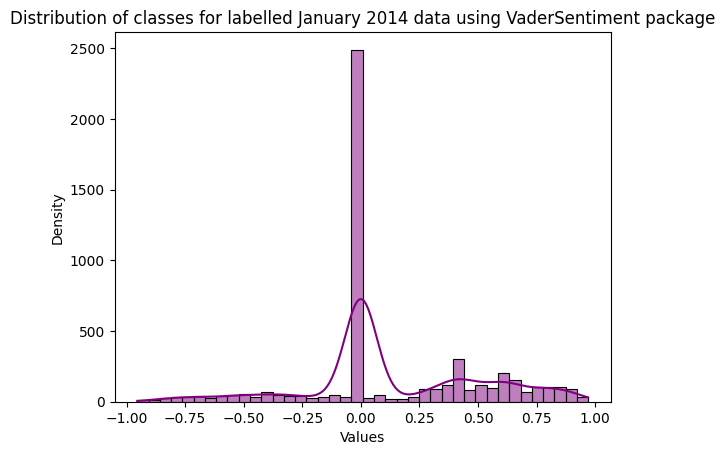

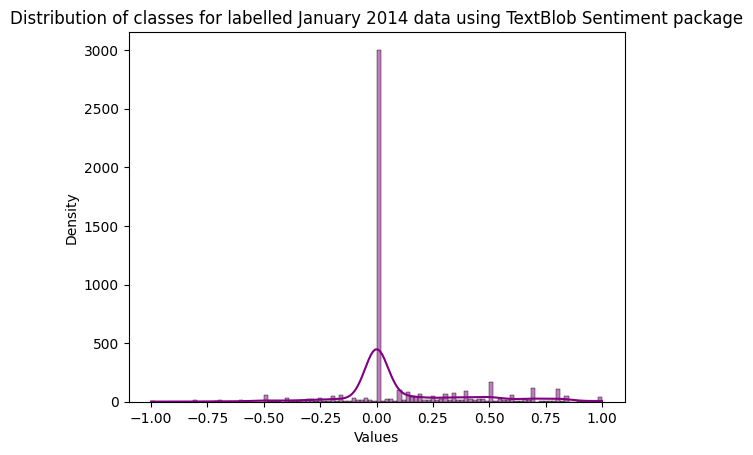

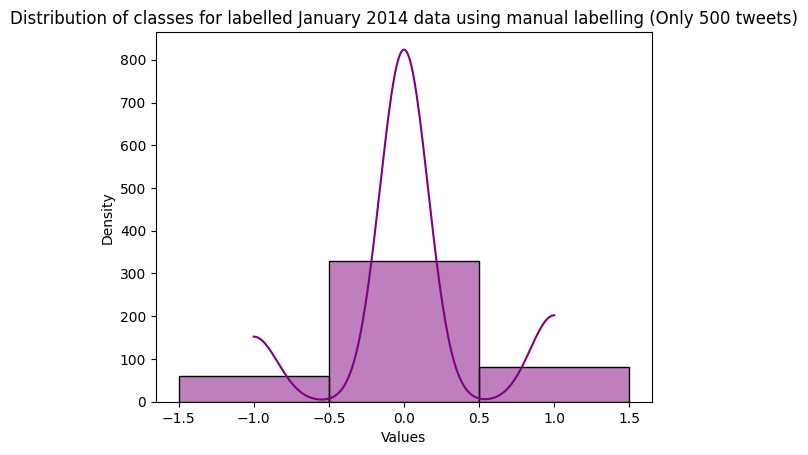

In [8]:
#distribution of classes
#sentiment packages
#VaderSentiment

sns.histplot(df1["VaderSentiment"], kde=True, color='purple')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution of classes for labelled January 2014 data using VaderSentiment package')
plt.show()
#TextBlob


# Create a customized histogram with density plot
sns.histplot(df1['TBSentiment'], kde=True, color='purple')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution of classes for labelled January 2014 data using TextBlob Sentiment package')
plt.show()

#Labelled data
sns.histplot(df1['label'], kde=True, color='purple', discrete=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution of classes for labelled January 2014 data using manual labelling (Only 500 tweets)')
plt.show()


In [9]:
df1["label"].head()

0    NaN
1    0.0
2    NaN
3    NaN
4    0.0
Name: label, dtype: float64

In [10]:
#Sentiment (DAILY)
df1 = df1.dropna(subset=['label'])

In [11]:
df1.shape

(472, 28)

In [12]:
#calculating daily sentiment
df1.loc['TBSentiment'] = pd.to_numeric(df1['TBSentiment'])
timedaily = df1.groupby(pd.Grouper(key='date', freq='d'))[['TBSentiment', 'VaderSentiment', 'label']].mean().dropna()
timedaily.reset_index(inplace=True)
timedaily.head()

C:\Users\NB332021\AppData\Local\Temp\ipykernel_19712\3987639124.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df1.loc['TBSentiment'] = pd.to_numeric(df1['TBSentiment'])


,date,TBSentiment,VaderSentiment,label
0,2014-01-01,0.152841,0.210707,0.214286
1,2014-01-02,0.206647,0.314908,0.125000
2,2014-01-03,0.159524,0.205431,0.153846
3,2014-01-04,0.347585,0.275144,0.250000
4,2014-01-05,0.092969,0.094144,0.062500


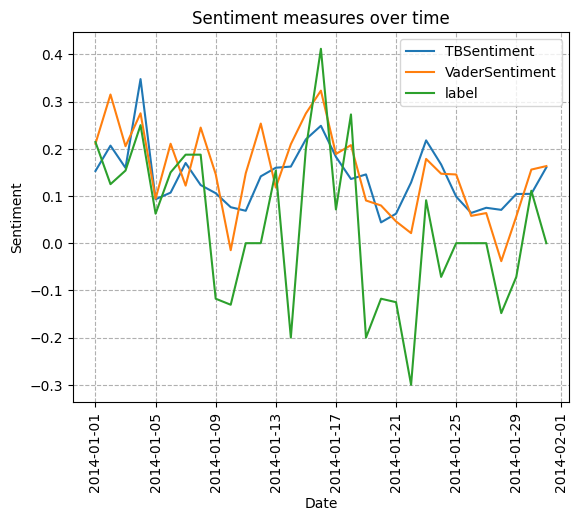

In [13]:
#Plot weekly sentiment
# Plot the first line
plt.plot(timedaily['date'], timedaily['TBSentiment'], label='TBSentiment')

# Plot the second line
plt.plot(timedaily['date'], timedaily['VaderSentiment'], label='VaderSentiment')

#Plot the third line
plt.plot(timedaily['date'], timedaily['label'], label='label')

# Set the x and y axis labels
plt.xlabel('Date')
plt.ylabel('Sentiment')

# Set the title of the plot
plt.title('Sentiment measures over time')

# Display the legend
plt.legend()
plt.xticks(rotation=90)
plt.grid(True, linestyle='--')
plt.show()

#thoughts: TB sentiment seems quite neutral. Need to check how those scores are measured. What is the range?
#VaderSentiment also seems to be positively skewed. Need to check the range there aswell
#welldone labelling. Seems to be following a similiar trend to VaderSentiment in the weekly sentiment data which
#is a good sign


In [14]:
#calculating weekly sentiment
df1.loc['TBSentiment'] = pd.to_numeric(df1['TBSentiment'])
timeweekly = df1.groupby(pd.Grouper(key='date', freq='w'))[['TBSentiment', 'VaderSentiment', 'label']].mean().dropna()
timeweekly.reset_index(inplace=True)
timeweekly.head()

C:\Users\NB332021\AppData\Local\Temp\ipykernel_19712\3023058358.py:3: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  timeweekly = df1.groupby(pd.Grouper(key='date', freq='w'))[['TBSentiment', 'VaderSentiment', 'label']].mean().dropna()


,date,TBSentiment,VaderSentiment,label
0,2014-01-05,0.195445,0.229963,0.156627
1,2014-01-12,0.107828,0.147875,0.031250
2,2014-01-19,0.176232,0.204543,0.142857
3,2014-01-26,0.106447,0.095119,-0.068182
4,2014-02-02,0.102641,0.063412,-0.048780


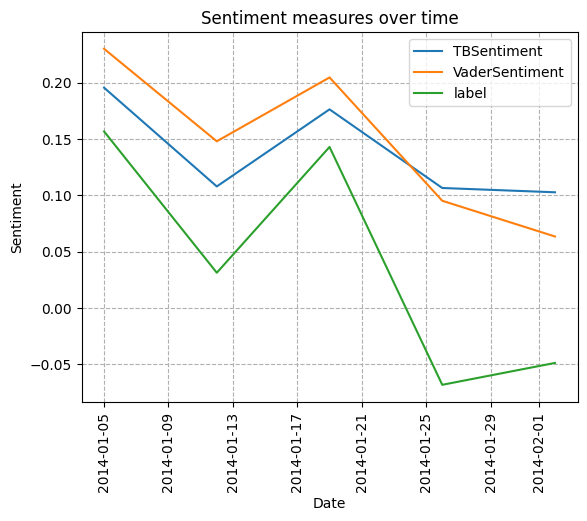

In [15]:
#Plot weekly sentiment
# Plot the first line
plt.plot(timeweekly['date'], timeweekly['TBSentiment'], label='TBSentiment')

# Plot the second line
plt.plot(timeweekly['date'], timeweekly['VaderSentiment'], label='VaderSentiment')

#Plot the third line
plt.plot(timeweekly['date'], timeweekly['label'], label='label')

# Set the x and y axis labels
plt.xlabel('Date')
plt.ylabel('Sentiment')

# Set the title of the plot
plt.title('Sentiment measures over time')

# Display the legend
plt.legend()
plt.xticks(rotation=90)
plt.grid(True, linestyle='--')
plt.show()

In [18]:
df2['TBSentiment'] = pd.to_numeric(df2['TBSentiment'])
df2['label'] = pd.to_numeric(df2['label'])
df2['VaderSentiment'] = pd.to_numeric(df2['VaderSentiment'])
df2.dtypes

source                         object
text                           object
created_at        datetime64[ns, UTC]
retweet_count                  object
reply_count                    object
like_count                     object
place_id                       object
label                         float64
date                   datetime64[ns]
Sentiment                       int64
VaderSentiment                float64
TBSentiment                   float64
dtype: object

In [17]:
for index, row in df2.iterrows():
    if row['label'] == "lab":
        df2.at[index, 'label'] = 0

C:\Users\NB332021\AppData\Local\Temp\ipykernel_19712\2632120748.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df2.loc['TBSentiment'] = pd.to_numeric(df2['TBSentiment'])
C:\Users\NB332021\AppData\Local\Temp\ipykernel_19712\2632120748.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df2.loc['label'] = pd.to_numeric(df2['label'])
C:\Users\NB332021\AppData\Local\Temp\ipykernel_19712\2632120748.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is depre

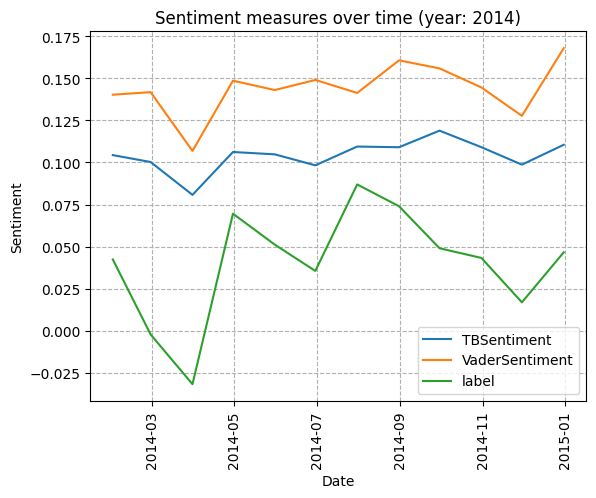

In [19]:
#Sentiment (MONTHLY)
df2.loc['TBSentiment'] = pd.to_numeric(df2['TBSentiment'])
df2.loc['label'] = pd.to_numeric(df2['label'])
df2.loc['VaderSentiment'] = pd.to_numeric(df2['VaderSentiment'])
timemonthly = df2.groupby(pd.Grouper(key='date', freq='M'))[['TBSentiment', 'VaderSentiment', 'label']].mean().dropna()
timemonthly.reset_index(inplace=True)
timemonthly.head()

# Plot the first lineplt.plot(timemonthly['date'], timemonthly['TBSentiment'], label='TBSentiment')
plt.plot(timemonthly['date'], timemonthly['TBSentiment'], label='TBSentiment')

# Plot the second line
plt.plot(timemonthly['date'], timemonthly['VaderSentiment'], label='VaderSentiment')

#Plot the third line
plt.plot(timemonthly['date'], timemonthly['label'], label='label')

# Set the x and y axis labels
plt.xlabel('Date')
plt.ylabel('Sentiment')

# Set the title of the plot
plt.title('Sentiment measures over time (year: 2014)')

# Display the legend
plt.legend()
plt.xticks(rotation=90)
plt.grid(True, linestyle='--')
plt.show()


In [20]:
#seeing if we can plot the locations of the tweets
#and see how many have been made in each (?)
df2.shape



(69444, 12)

In [21]:
print(df2['place_id'])                          


0                 8b9ec16fdc0d7e55
1                 6444d281acdd5f98
2                 e564d30dc173d2a8
3                 8b9ec16fdc0d7e55
4                 9d7cae88ff6a29f5
                        ...       
69691             e564d30dc173d2a8
69692             08cf288c7b54f834
TBSentiment                    NaN
label                          NaN
VaderSentiment                 NaN
Name: place_id, Length: 69444, dtype: object


In [22]:
import googlemaps

# Replace YOUR_API_KEY with your actual API key
gmaps = googlemaps.Client(key='YOUR_API_KEY')

place_id = '08cf288c7b54f834'

# Make a Place Details request
place_details = gmaps.place(place_id, fields=['name', 'formatted_address'])

# Print the place name and address
print(f'Place Name: {place_details["name"]}')
print(f'Address: {place_details["formatted_address"]}')

#https://developers.google.com/maps/documentation/elevation/cloud-setup


ModuleNotFoundError: No module named 'googlemaps'